In [1]:
import numpy as np
import torch
from tqdm import tqdm

from dataloader import RefCOCOg  # custom dataloader
from yoco import YOCO  # contains YOLO + CLIP wrappers

device = "cuda" if torch.cuda.is_available() else "cpu"

Using cache found in /Users/azel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-27 Python-3.9.6 torch-2.0.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


First, We load the RefCOCOg dataset using our custom dataloader.

In [ ]:
dataset = RefCOCOg(ds_path='dataset/refcocog')

Let's instantiate our YOCO architecture and apply it on 3 random samples.

Using cache found in /Users/azel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-27 Python-3.9.6 torch-2.0.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


[INFO] Running YOLO on the image...


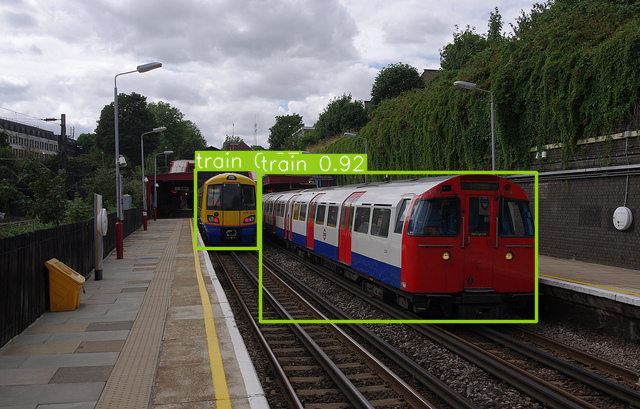

[INFO] YOLO found 2 objects
[INFO] Running CLIP on detected objects...
[INFO] Running CLIP on the prompt...


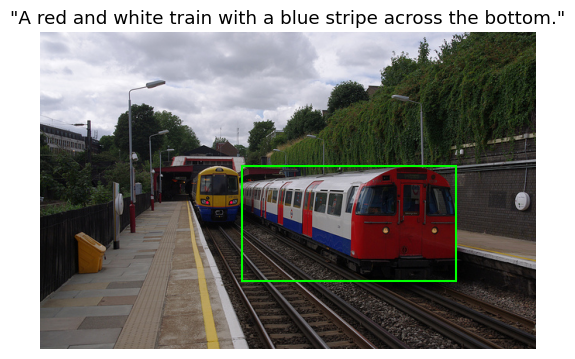

[INFO] Running YOLO on the image...


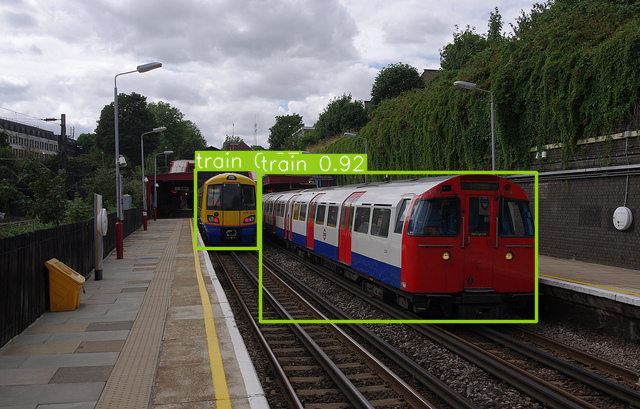

[INFO] YOLO found 2 objects
[INFO] Running CLIP on detected objects...
[INFO] Running CLIP on the prompt...


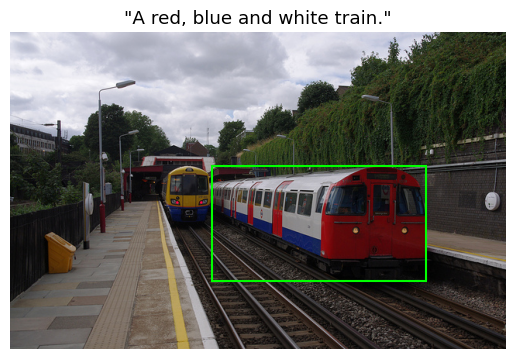

[INFO] Running YOLO on the image...


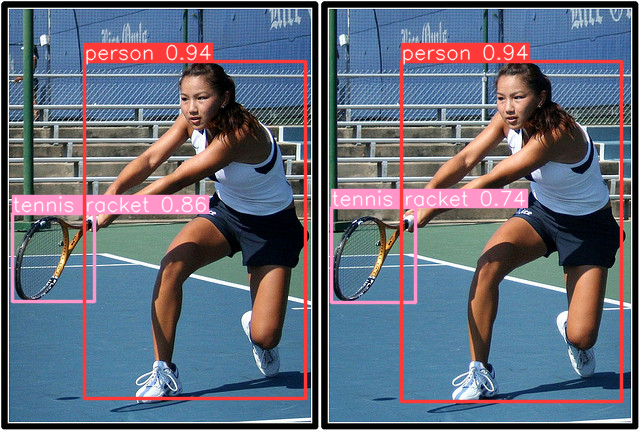

[INFO] YOLO found 4 objects
[INFO] Running CLIP on detected objects...
[INFO] Running CLIP on the prompt...


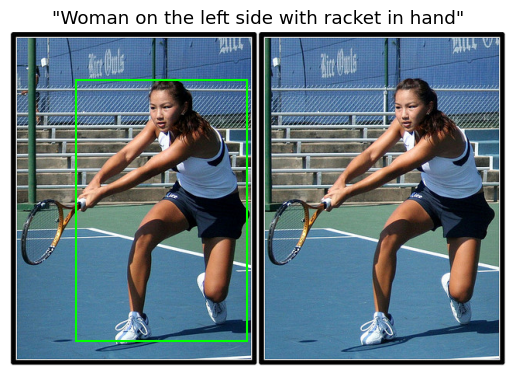

[INFO] Running YOLO on the image...


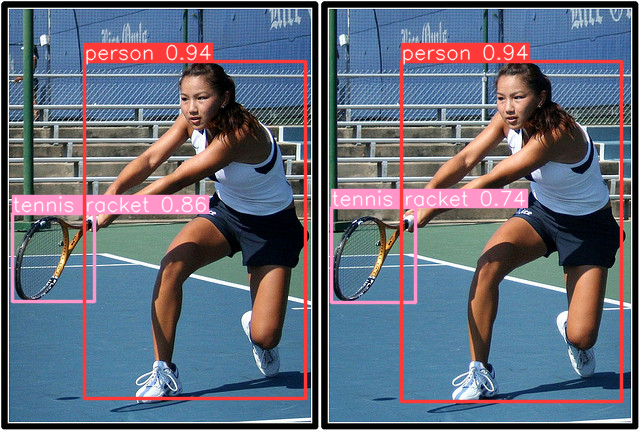

[INFO] YOLO found 4 objects
[INFO] Running CLIP on detected objects...
[INFO] Running CLIP on the prompt...


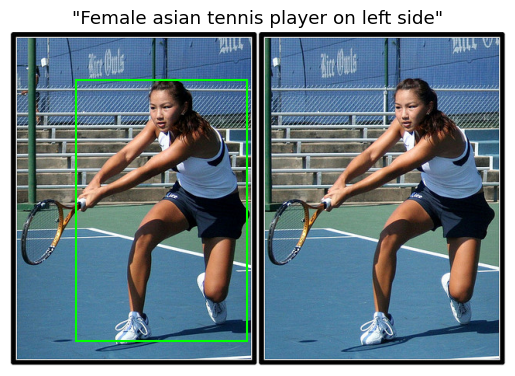

[INFO] Running YOLO on the image...


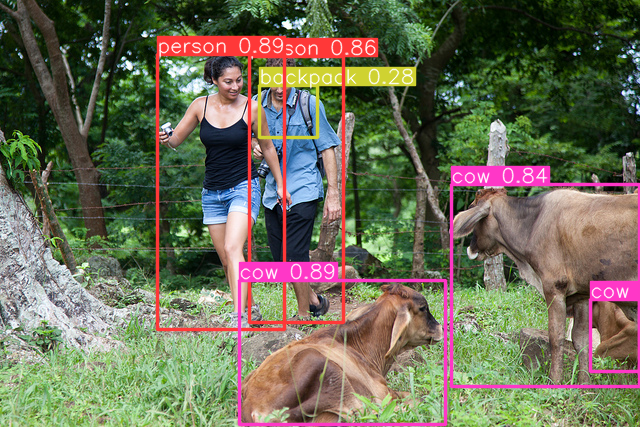

[INFO] YOLO found 6 objects
[INFO] Running CLIP on detected objects...
[INFO] Running CLIP on the prompt...


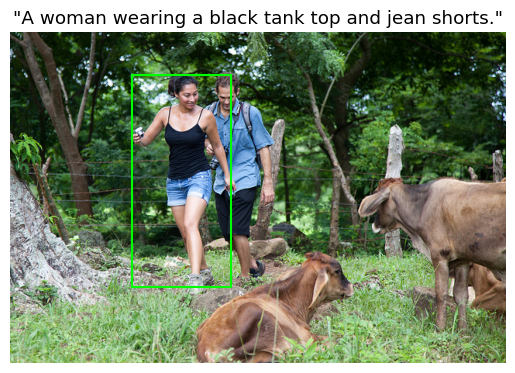

[INFO] Running YOLO on the image...


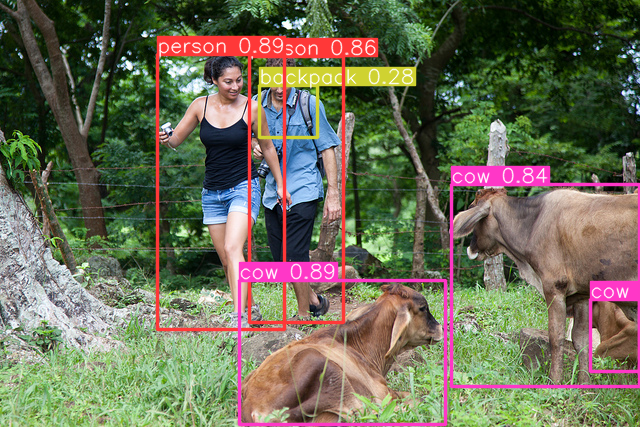

[INFO] YOLO found 6 objects
[INFO] Running CLIP on detected objects...
[INFO] Running CLIP on the prompt...


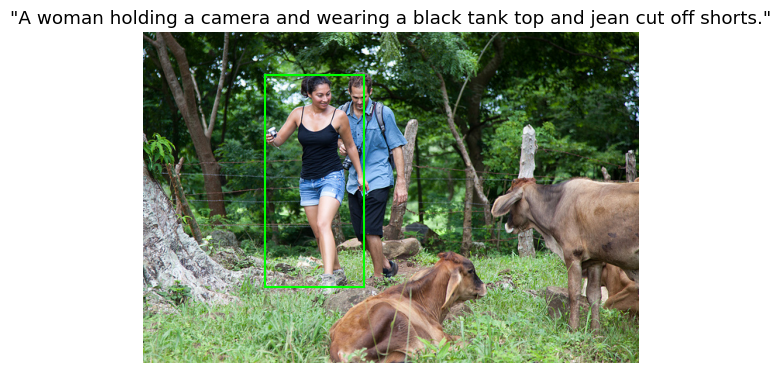

In [2]:
%matplotlib inline

yoco_model = YOCO(device=device, quiet=False)

for n in range(3):

    idx = np.random.randint(0, len(dataset))
    sample = dataset[idx]

    for sentence in sample.sentences:
        yoco_model(sample.path, sentence)

Let's compute some metrics.

In [7]:
yoco_model = YOCO(device=device)

euclidean_dists = list()
cosine_sims = list()

for idx in tqdm(range(100), desc=f"Testing on {100} images"):
    sample = dataset[idx]

    for sentence in sample.sentences:
        # Let's compute some metrics

        sc = yoco_model(sample.path, sentence)

        # Semantic Similarity

        euclidean_dists.append(float(sc["euclidean"]))  # Euclidean Distance
        cosine_sims.append(float(sc["cosine"]))  # Cosine Similarity

        # Localization Accuracy

        pass  # Intersection over Union (IoU)

        # Grounding Accuracy

        pass  # Recall

print(f"Mean Euclidean Distance: {np.mean(euclidean_dists)}")
print(f"Mean Cosine Similarity: {np.mean(cosine_sims)}")

Using cache found in /Users/azel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-27 Python-3.9.6 torch-2.0.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
Testing on 100 images: 100%|██████████| 100/100 [01:09<00:00,  1.44it/s]

Mean Euclidean Distance: 10.485760238981738
Mean Cosine Similarity: 0.1528291819789975
